# Power Prediction of Wind Turbine

The aim of this mini project is predicting the active power of a wind turbine in two ways:
    1. Using preditctive features
    2. Using time based sequences

Read the .csv file attached to this project. The columns are as follows:
    * Date/Time (for 10 minutes intervals)
    * LV ActivePower (kW): The power generated by the turbine for that moment
    * Wind Speed (m/s): The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)
    * TheoreticalPowerCurve (KWh): The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer
    * Wind Direction (°): The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

Perform the following tasks:
 * Use Exploratpry Data Analysis and Visualization to have a better sense of our data.
 * Based on the graphs, can you identify when the generated power is higher?
 * Check if you data set contains any missing values or duplicated information and handle them.
 * Perfom feature engineering and feature extraction to infer more infrmative features. 
 * Answer the below questions using siutable graphs:
     * Find the average power production (active power) for different wind speeds. <br>
     * Find the power production considering different wind directions and speeds?<br>
     * Do you think the manufacturer's theoritical power production curve fits well with the real production?<br>
     * Find the wind speed threshold value for zero theorical power?<br>
 * Have you seen any outlier in your data in any of the graphs? Any idea why they happened?
 * Handle the outliers in a logical and intelligent manner.
 * Predict the active power using wind speed and wind direction (use any model except LSTM)
 * Predict the active power of December using LSTM, check for overfitting with a validation set.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [20]:
df = pd.read_csv('T1.csv', parse_dates=['Date/Time'], index_col="Date/Time")

In [4]:
df.columns

Index(['LV ActivePower (kW)', 'Wind Speed (m/s)',
       'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)'],
      dtype='object')

In [21]:
df = df.rename(columns={'LV ActivePower (kW)':'ActivePower', 
                   'Wind Speed (m/s)': 'WindSpeed', 
                   'Theoretical_Power_Curve (KWh)': 'TheorticalPower', 
                   'Wind Direction (°)': 'WindDir'})

In [24]:
df.index.date

array([datetime.date(2018, 1, 1), datetime.date(2018, 1, 1),
       datetime.date(2018, 1, 1), ..., datetime.date(2018, 12, 31),
       datetime.date(2018, 12, 31), datetime.date(2018, 12, 31)],
      dtype=object)

In [26]:
pd.__version__

'1.0.1'

In [25]:
df.index.time

array([datetime.time(0, 0), datetime.time(0, 10), datetime.time(0, 20),
       ..., datetime.time(23, 30), datetime.time(23, 40),
       datetime.time(23, 50)], dtype=object)

In [10]:
df.columns

Index(['ActivePower', 'WindSpeed', 'TheorticalPower', 'WindDir'], dtype='object')

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ActivePower,50530.0,1307.684332,1312.459242,-2.471405,50.677890,825.838074,2482.507568,3618.732910
WindSpeed,50530.0,7.557952,4.227166,0.000000,4.201395,7.104594,10.300020,25.206011
TheorticalPower,50530.0,1492.175463,1368.018238,0.000000,161.328167,1063.776283,2964.972462,3600.000000
WindDir,50530.0,123.687559,93.443736,0.000000,49.315437,73.712978,201.696720,359.997589


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50530 entries, 2018-01-01 00:00:00 to 2018-12-31 23:50:00
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ActivePower      50530 non-null  float64
 1   WindSpeed        50530 non-null  float64
 2   TheorticalPower  50530 non-null  float64
 3   WindDir          50530 non-null  float64
dtypes: float64(4)
memory usage: 1.9 MB


In [13]:
df.isnull().sum()

ActivePower        0
WindSpeed          0
TheorticalPower    0
WindDir            0
dtype: int64

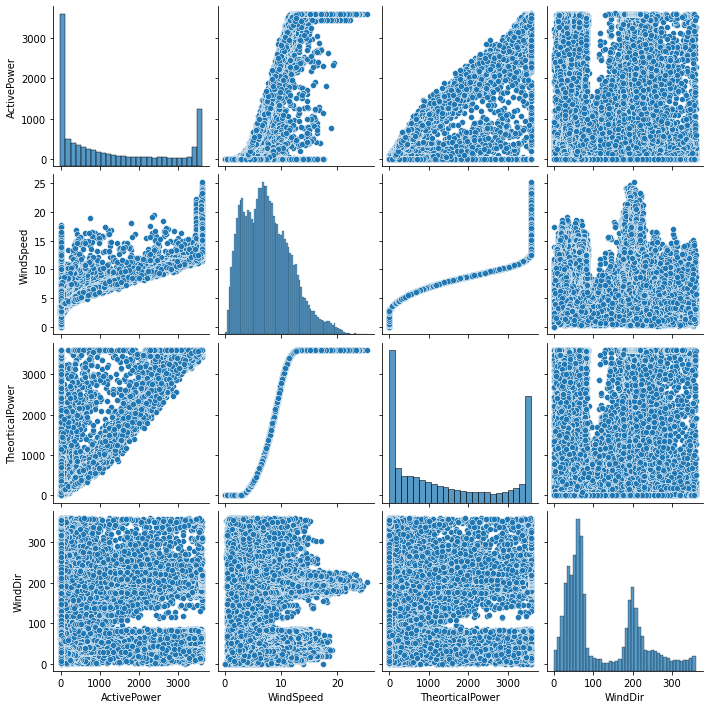

In [14]:
sns.pairplot(df)

<AxesSubplot:>

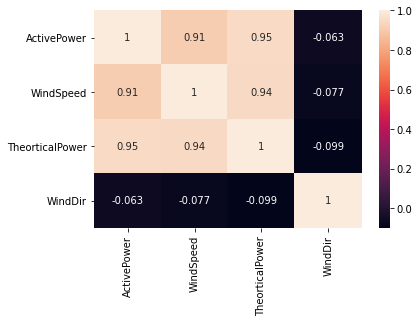

In [16]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
# Feature Extraction

In [6]:
df['hour'] = df.index.hour
df['day_of_month'] = df.index.day
# Get the day of the week in number (starting from Monday , Monday = 0 and Sunday =6)
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month

In [18]:
df.columns

Index(['ActivePower', 'WindSpeed', 'TheorticalPower', 'WindDir', 'hour',
       'day_of_month', 'day_of_week', 'month'],
      dtype='object')

<AxesSubplot:>

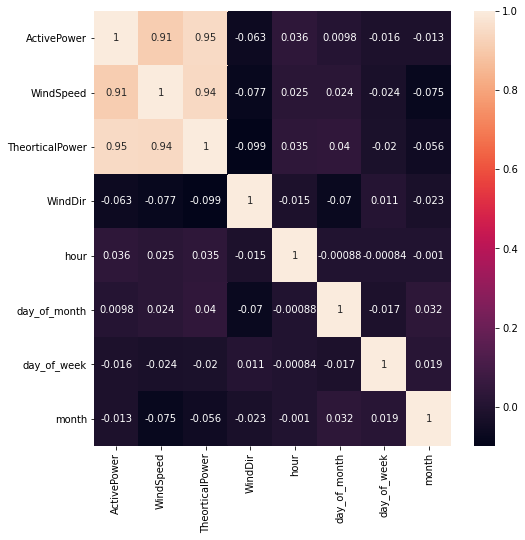

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Date/Time', ylabel='ActivePower'>

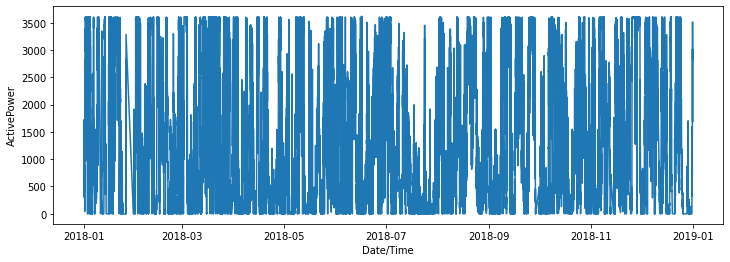

In [21]:
plt.figure(figsize=(12,4))
sns.lineplot(x=df.index, y="ActivePower", data=df)

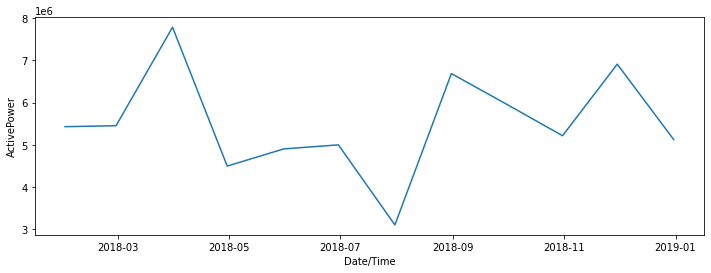

In [22]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html

df_by_month = df.resample('M').sum()
plt.figure(figsize=(12, 4))
sns.lineplot(x=df_by_month.index, y="ActivePower", data=df_by_month);

<AxesSubplot:xlabel='month', ylabel='ActivePower'>

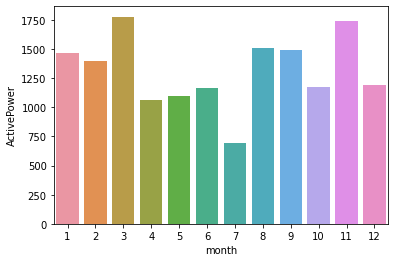

In [60]:
monthly = df.groupby('month').mean()
sns.barplot(x=monthly.index, y='ActivePower', data=monthly)

In [ ]:
# March, Nov, Aug

<AxesSubplot:xlabel='hour', ylabel='ActivePower'>

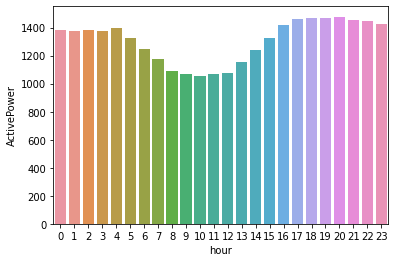

In [61]:
hourly = df.groupby('hour').mean()
sns.barplot(x=hourly.index, y='ActivePower', data=hourly)

In [ ]:
# after 4pm maximum power

<AxesSubplot:xlabel='day_of_week', ylabel='ActivePower'>

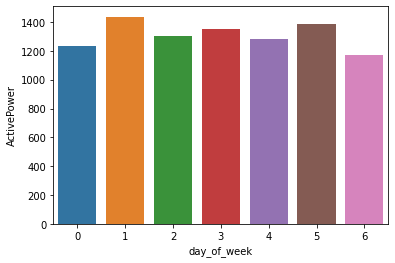

In [63]:
day = df.groupby('day_of_week').mean()
sns.barplot(x=day.index, y='ActivePower', data=day)

<AxesSubplot:xlabel='day_of_month', ylabel='ActivePower'>

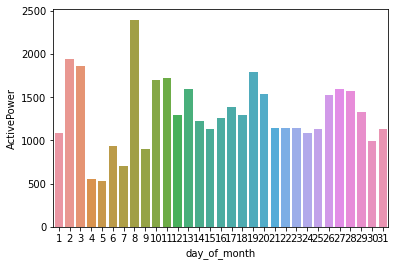

In [64]:
date = df.groupby('day_of_month').mean()
sns.barplot(x=date.index, y='ActivePower', data=date)

<AxesSubplot:xlabel='WindSpeed', ylabel='Count'>

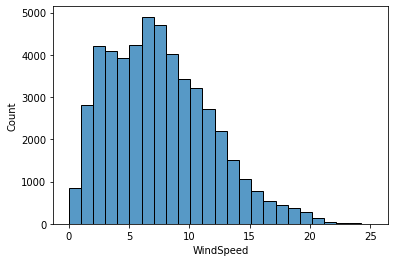

In [37]:
sns.histplot(x=df['WindSpeed'], bins=25)

<AxesSubplot:xlabel='WindDir', ylabel='Count'>

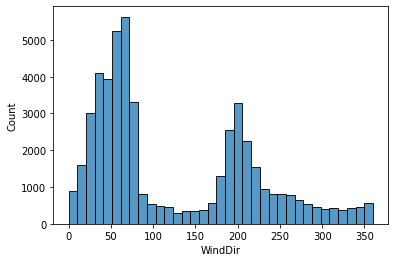

In [39]:
sns.histplot(x=df['WindDir'], bins=35)

<AxesSubplot:xlabel='TheorticalPower', ylabel='Count'>

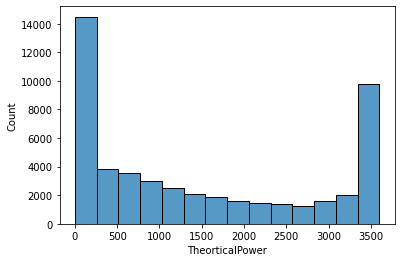

In [42]:
sns.histplot(x=df['TheorticalPower'], bins=14)

<AxesSubplot:xlabel='ActivePower', ylabel='Count'>

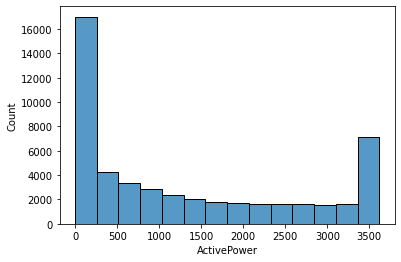

In [43]:
sns.histplot(x=df['ActivePower'], bins=14)

In [ ]:
# What is the average power production level for different wind speeds?

In [66]:
df['WindSpeed'].describe()

count    50530.000000
mean         7.557952
std          4.227166
min          0.000000
25%          4.201395
50%          7.104594
75%         10.300020
max         25.206011
Name: WindSpeed, dtype: float64

In [7]:
bins = [0, 5, 10, 15, 20, 25]
names = ['<5', '5-10', '10-15', '15-20', '20<']

df['WindSpeed_C'] = pd.cut(df['WindSpeed'], bins, labels=names)

<AxesSubplot:xlabel='WindSpeed_C', ylabel='ActivePower'>

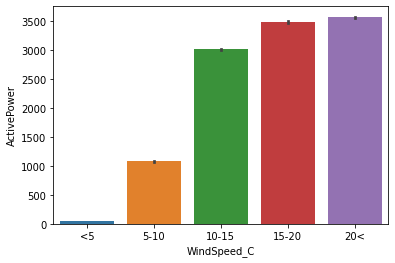

In [8]:
sns.barplot(x='WindSpeed_C', y='ActivePower', data=df)

<AxesSubplot:xlabel='WindSpeed', ylabel='WindDir'>

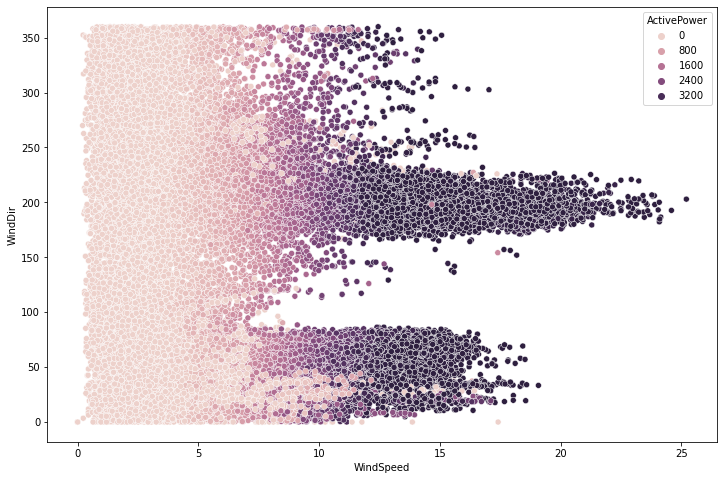

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='WindSpeed',y='WindDir', hue='ActivePower', data=df)

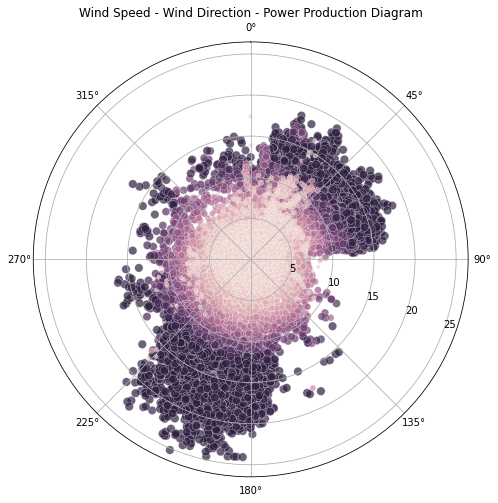

In [11]:
# Creating the polar diagram
from math import radians

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
# Inside circles are the wind speed and marker color and size represents the amount of power production
sns.scatterplot(x=[radians(x) for x in df['WindDir']], 
                y=df['WindSpeed'],
                size=df['ActivePower'],
                hue=df['ActivePower'],
                alpha=0.7, legend=None)
# Setting the polar diagram's top represents the North 
ax.set_theta_zero_location('N')
# Setting -1 to start the wind direction clockwise
ax.set_theta_direction(-1)
# Setting wind speed labels in a better position to see
ax.set_rlabel_position(110)
plt.title('Wind Speed - Wind Direction - Power Production Diagram')
plt.ylabel(None);

<AxesSubplot:xlabel='TheorticalPower', ylabel='ActivePower'>

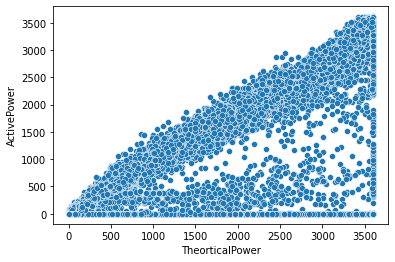

In [16]:
sns.scatterplot(x='TheorticalPower', y='ActivePower', data=df)

In [ ]:
# Does the manufacturer's theoritical power production curve fit well with the real production?

<AxesSubplot:xlabel='WindSpeed', ylabel='ActivePower'>

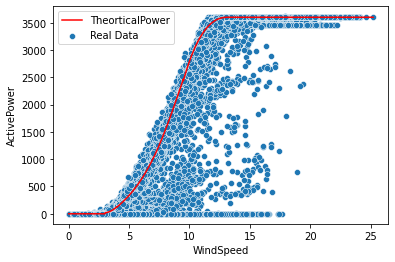

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='WindSpeed', y='ActivePower', label='Real Data', data=df)
sns.lineplot(x='WindSpeed', y = 'TheorticalPower', label='TheorticalPower', color='red', data=df)

In [ ]:
# what is the minimum wind speed for theoritical power production curve?

<AxesSubplot:xlabel='WindSpeed', ylabel='Count'>

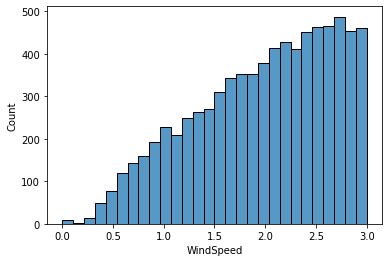

In [14]:
# select data where theoretical power is 0
zero_power_t = df[df['TheorticalPower'] == 0]
sns.histplot(zero_power['WindSpeed'])

In [15]:
# in theory, if the wind speed is less than 3 m/s the wind turbine does not produce any power

In [16]:
# still, in the previous plot we found  some points where the speed is more than 3 and we recieved 0 power. Why?

In [20]:
# wind speed > 3m/s and power production = 0, 
zero_power_a = df[(df['WindSpeed'] > 3) & (df['ActivePower'] == 0)]

<AxesSubplot:xlabel='WindSpeed', ylabel='Count'>

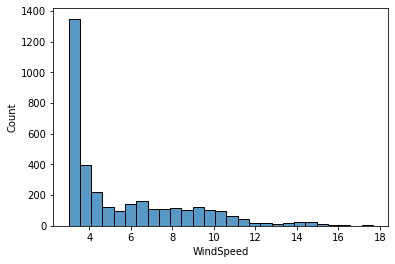

In [21]:
sns.histplot(zero_power_a['WindSpeed'])

<AxesSubplot:xlabel='month', ylabel='count'>

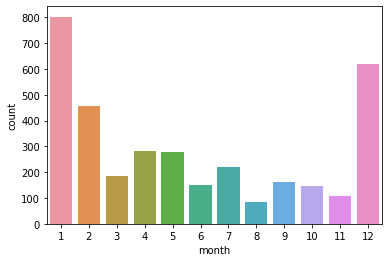

In [23]:
sns.countplot(x=zero_power_a['month'])

In [28]:
# maintenance or outlier
df.iloc[(df['WindSpeed'] > 3) & (df['ActivePower'] == 0)

,ActivePower,WindSpeed,TheorticalPower,WindDir,hour,day_of_month,day_of_week,month
Date/Time,,,,,,,,
2018-03-01 16:00:00,-0.393068,2.185888,0.0,238.410294,16,1,3,3
2018-05-01 08:20:00,4.355070,2.853813,0.0,85.753937,8,1,1,5
2018-06-01 15:50:00,-0.456533,2.949518,0.0,204.901093,15,1,4,6
2018-08-01 10:00:00,8.484796,2.791786,0.0,176.252594,10,1,2,8
2018-08-01 10:30:00,26.924271,2.927467,0.0,185.042404,10,1,2,8
...,...,...,...,...,...,...,...,...
2018-12-17 08:10:00,1.672264,2.331636,0.0,84.886703,8,17,0,12
2018-12-17 19:20:00,0.576534,2.815365,0.0,203.218704,19,17,0,12
2018-12-21 05:40:00,20.305180,2.648756,0.0,175.433197,5,21,4,12


In [29]:
df.shape

(50530, 8)

In [30]:
zero_power_a.shape

(3497, 8)

In [30]:
df_no_outlier = df.drop(df[(df['WindSpeed'] > 3) & (df['ActivePower'] == 0)].index)
df_no_outlier.shape

(47033, 8)

In [32]:
50530-3497

47033

In [36]:
# checking for other outliers
df_no_outlier.columns

Index(['ActivePower', 'WindSpeed', 'TheorticalPower', 'WindDir', 'hour',
       'day_of_month', 'day_of_week', 'month'],
      dtype='object')

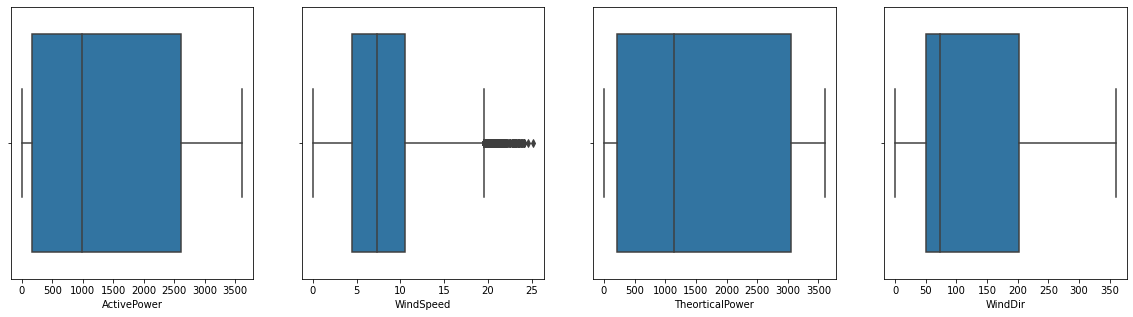

In [47]:
columns = ['ActivePower', 'WindSpeed', 'TheorticalPower', 'WindDir']
i=1
plt.figure(figsize=(20,5))
for feature in columns:
    plt.subplot(1,4,i)
    sns.boxplot(x=feature, data=df_no_outlier)
    i+=1

In [ ]:
# https://www.mathwords.com/o/outlier.htm#:~:text=One%20definition%20of%20outlier%20is,given%20number%20is%20an%20outlier.&text=IQR%20%3D%2010.5%20%E2%80%93%203.5%20%3D%207,so%201.5%C2%B7IQR%20%3D%2010.5.

In [31]:
windSpeed = df_no_outlier['WindSpeed']

In [32]:
Q1 = windSpeed.quantile(0.25)
Q3 = windSpeed.quantile(0.75)
IQR = Q3-Q1

lower_band = Q1 - (1.5*IQR)
upper_band = Q3 + (1.5*IQR)

print('lower_band =', lower_band)
print('upper_band =', upper_band)

lower_band = -4.576168060302602
upper_band = 19.50920486450172


In [56]:
windSpeed[(windSpeed < lower_band) | (windSpeed > upper_band)].shape

(407,)

In [55]:
df_no_outlier.drop(windSpeed[(windSpeed < lower_band) | (windSpeed > upper_band)].index)

,ActivePower,WindSpeed,TheorticalPower,WindDir,hour,day_of_month,day_of_week,month
Date/Time,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,0,1
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,0,1
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,0,1
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1,0,1
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1,0,1
...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23,31,0,12
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23,31,0,12
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23,31,0,12


In [57]:
47033-407

46626

In [81]:
df_no_outlier[df_no_outlier['WindSpeed']>=19]['ActivePower'].mean()

3566.4634427974706

In [33]:
mask = df_no_outlier.WindSpeed > 19
column_name = 'WindSpeed'
df_no_outlier.loc[mask, column_name] = 19

In [88]:
df_no_outlier['WindSpeed'].max()

19.0

In [34]:
df = df_no_outlier

<AxesSubplot:xlabel='WindSpeed', ylabel='ActivePower'>

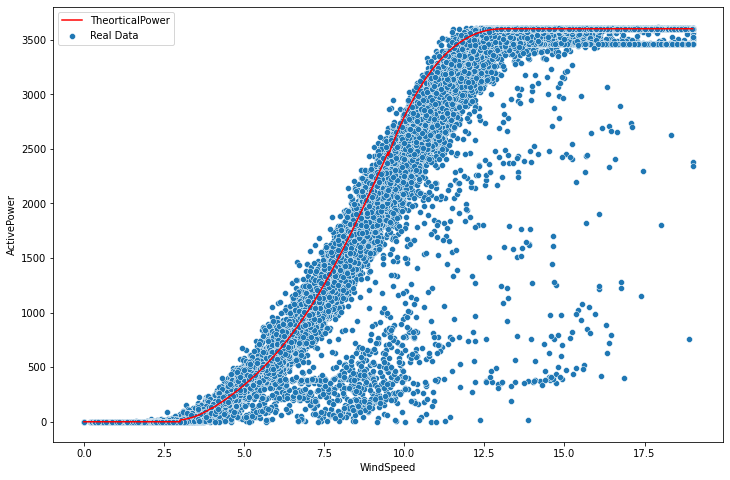

In [90]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='WindSpeed', y='ActivePower', label='Real Data', data=df)
sns.lineplot(x='WindSpeed', y = 'TheorticalPower', label='TheorticalPower', color='red', data=df)

In [ ]:
# important features
    # month
    # hour
    # wind direction
    # wind speed

In [ ]:
# Power prediction 

In [ ]:
# data based: wind speed, wind direction, month of the year and the hour of the day.

In [4]:
from sklearn.model_selection import train_test_split

In [35]:
X = df[['month', 'hour', 'WindSpeed', 'WindDir']]
#X = df[['WindSpeed', 'WindDir']]

In [36]:
y = df['ActivePower']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
X_train = scaler.fit_transform(X_train)

In [40]:
X_test = scaler.transform(X_test)

In [14]:
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()

In [42]:
lm.fit(X_train, y_train)

LinearRegression()

In [43]:
print(lm.intercept_)

-915.7239638212814


In [44]:
lm.coef_

array([  89.93738955,   32.2997461 , 5554.92448113,   30.11548496])

In [45]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])
cdf

,Coeff
month,89.937390
hour,32.299746
WindSpeed,5554.924481
WindDir,30.115485


In [46]:
predictions = lm.predict(X_test)
predictions

array([ 194.24072603, 1342.54052409,  -26.42375983, ...,  276.43492709,
       -144.95506341, 1908.29294774])

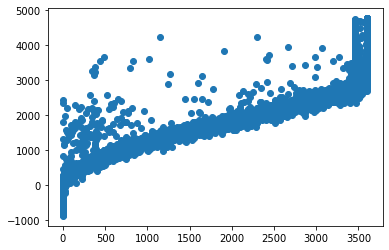

In [47]:
plt.scatter(y_test, predictions)

<AxesSubplot:xlabel='ActivePower', ylabel='Count'>

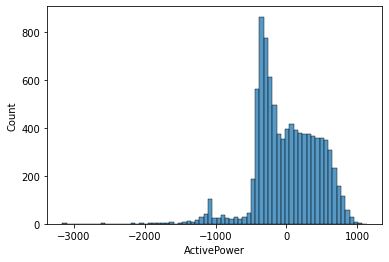

In [48]:
sns.histplot(y_test-predictions)

In [23]:
from sklearn import metrics

In [49]:
metrics.mean_absolute_error(y_test, predictions)

356.0417503047526

In [50]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

446.87881990303123

In [51]:
df['ActivePower'].describe()

count    47033.000000
mean      1404.913344
std       1309.208087
min         -2.471405
25%        166.337494
50%        987.410278
75%       2611.777100
max       3618.732910
Name: ActivePower, dtype: float64

In [52]:
cmpr = pd.concat([pd.DataFrame(y_test.to_numpy()), pd.DataFrame(predictions)], ignore_index=True, axis = 1)
cmpr.head()

,0,1
0,81.484451,194.240726
1,1023.619019,1342.540524
2,0.153733,-26.423760
3,2159.024902,1812.831425
4,537.658325,930.092333


<AxesSubplot:ylabel='ActivePower'>

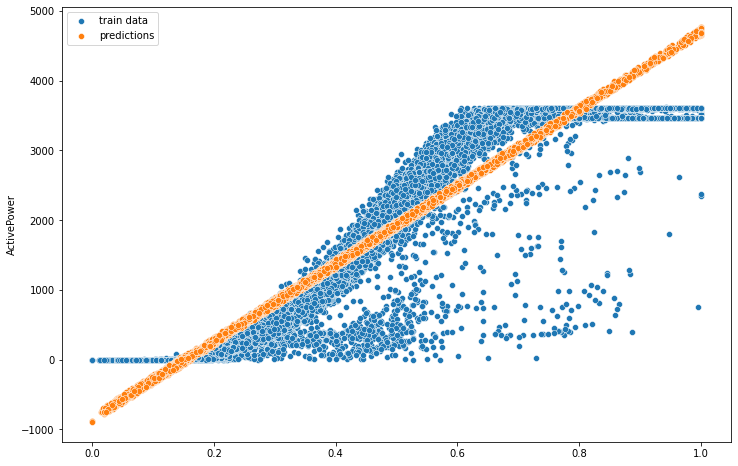

In [53]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=X_train[:,2], y=y_train, label='train data')
sns.scatterplot(x=X_test[:,2], y=predictions, label='predictions')
#sns.lineplot(x='WindSpeed', y = 'TheorticalPower', label='TheorticalPower', color='red', data=df)

In [245]:
# nonlinearity

In [54]:
import tensorflow as tf
from tensorflow import keras

# building LSTM model
model = keras.Sequential()
model.add(keras.layers.Dense(units=2, activation='tanh'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=20, activation='tanh'))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=10, activation='relu'))
model.add(keras.layers.Dropout(rate=0.2))
# predicting a single continous value [regression]
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [55]:
# training the model
history = model.fit(
    X_train, y_train, 
    # training data will be seen 30 times
    epochs=50, 
    # the number of sunsamples the model takes while training
    batch_size=32, 
    # number of data reserved for validation
    validation_split=0.1,
    # time series
    shuffle=True
)

Epoch 1/50
1059/1059 [==============================] - 1s 1ms/step - loss: 3402379.5000 - val_loss: 2910234.5000
Epoch 2/50
1059/1059 [==============================] - 1s 908us/step - loss: 2543023.0000 - val_loss: 2081485.1250
Epoch 3/50
1059/1059 [==============================] - 1s 924us/step - loss: 1980772.3750 - val_loss: 1741627.0000
Epoch 4/50
1059/1059 [==============================] - 1s 907us/step - loss: 1365566.1250 - val_loss: 714427.2500
Epoch 5/50
1059/1059 [==============================] - 1s 905us/step - loss: 723532.8750 - val_loss: 314565.3438
Epoch 6/50
1059/1059 [==============================] - 1s 930us/step - loss: 507180.5312 - val_loss: 178196.9219
Epoch 7/50
1059/1059 [==============================] - 1s 891us/step - loss: 434058.5938 - val_loss: 120491.6406
Epoch 8/50
1059/1059 [==============================] - 1s 920us/step - loss: 413428.3125 - val_loss: 86719.6094
Epoch 9/50
1059/1059 [==============================] - 1s 924us/step - loss: 381900

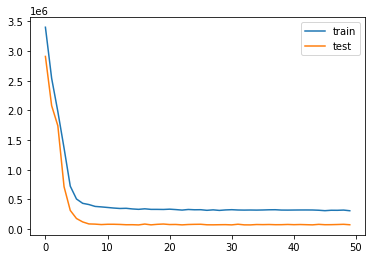

In [56]:
# check the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [57]:
y_pred = model.predict(X_test)

<AxesSubplot:ylabel='ActivePower'>

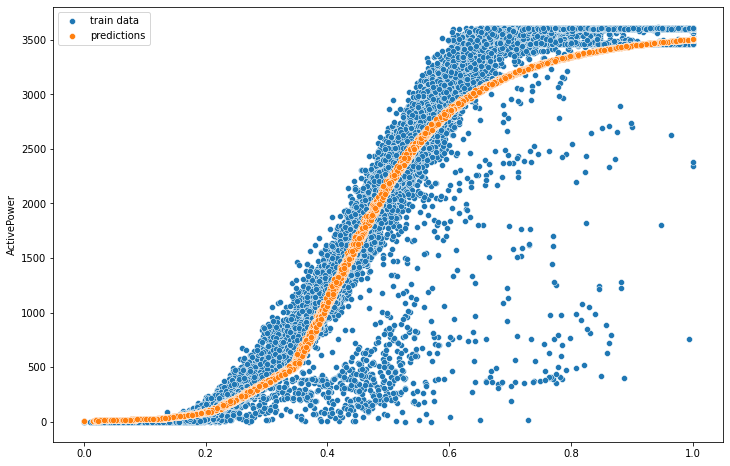

In [59]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=X_train[:,2], y=y_train, label='train data')
sns.scatterplot(x=X_test[:,2], y=y_pred[:,0], label='predictions')
#sns.lineplot(x='WindSpeed', y = 'TheorticalPower', label='TheorticalPower', color='red', data=df)

In [61]:
X_train_i = scaler.inverse_transform(X_train)
X_test_i = scaler.inverse_transform(X_test)

<AxesSubplot:xlabel='WindSpeed', ylabel='ActivePower'>

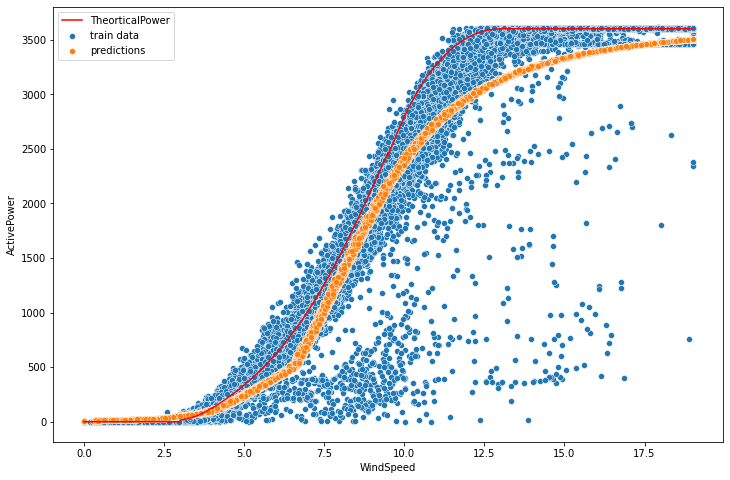

In [63]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=X_train_i[:,2], y=y_train, label='train data')
sns.scatterplot(x=X_test_i[:,2], y=y_pred[:,0], label='predictions')
sns.lineplot(x='WindSpeed', y = 'TheorticalPower', label='TheorticalPower', color='red', data=df)

# LSTM

In [3]:
df = pd.read_csv('T1.csv', parse_dates=['Date/Time'], index_col="Date/Time")

In [4]:
df = df.rename(columns={'LV ActivePower (kW)':'ActivePower', 
                   'Wind Speed (m/s)': 'WindSpeed', 
                   'Theoretical_Power_Curve (KWh)': 'TheorticalPower', 
                   'Wind Direction (°)': 'WindDir'})

In [5]:
train_size = int(len(df) * 0.83)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

41939 8591


In [6]:
# Keeping a copy
train_cp = train.copy()
test_cp = test.copy()

In [7]:
from sklearn.preprocessing import RobustScaler

f_columns = ['WindSpeed','TheorticalPower','WindDir']

f_transformer = RobustScaler()
f_transformer = f_transformer.fit(train[f_columns].to_numpy())
             
train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())

pwr_transformer = RobustScaler()
pwr_transformer = pwr_transformer.fit(train[['ActivePower']])

train['ActivePower'] = pwr_transformer.transform(train[['ActivePower']])
test['ActivePower'] = pwr_transformer.transform(test[['ActivePower']])

C:\Users\Mojgan\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Mojgan\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Mojgan\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)

In [11]:
# cutting timeseries data into sequences 
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [15]:
# looking daily at the data
time_steps = 24

X_train, y_train = create_dataset(train, train.ActivePower, time_steps)
X_test, y_test = create_dataset(test, test.ActivePower, time_steps)

# reshape to [samples, time_steps, n_features]
print(X_train.shape, y_train.shape)

(41915, 24, 4) (41915,)


In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
# building LSTM model
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
# penalize complex models
model.add(keras.layers.Dropout(rate=0.2))
# predicting a single continous value [regression]
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
# training the model
history = model.fit(
    X_train, y_train, 
    # training data will be seen 30 times
    epochs=30, 
    # the number of sunsamples the model takes while training
    batch_size=32, 
    # number of data reserved for validation
    validation_split=0.1,
    # time series
    shuffle=False
)

Epoch 1/30
1179/1179 [==============================] - 52s 44ms/step - loss: 0.0287 - val_loss: 0.0129
Epoch 2/30
1179/1179 [==============================] - 45s 38ms/step - loss: 0.0160 - val_loss: 0.0116
Epoch 3/30
1179/1179 [==============================] - 45s 38ms/step - loss: 0.0131 - val_loss: 0.0115
Epoch 4/30
1179/1179 [==============================] - 46s 39ms/step - loss: 0.0129 - val_loss: 0.0115
Epoch 5/30
1179/1179 [==============================] - 48s 41ms/step - loss: 0.0127 - val_loss: 0.0115
Epoch 6/30
1179/1179 [==============================] - 45s 38ms/step - loss: 0.0125 - val_loss: 0.0116
Epoch 7/30
1179/1179 [==============================] - 47s 40ms/step - loss: 0.0125 - val_loss: 0.0114
Epoch 8/30
1179/1179 [==============================] - 43s 37ms/step - loss: 0.0121 - val_loss: 0.0114
Epoch 9/30
1179/1179 [==============================] - 45s 38ms/step - loss: 0.0122 - val_loss: 0.0114
Epoch 10/30
1179/1179 [==============================] - 45s 38m

In [128]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 256)               136192    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 136,449
Trainable params: 136,449
Non-trainable params: 0
_________________________________________________________________


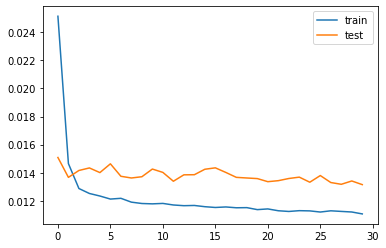

In [129]:
# check the loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [130]:
y_pred = model.predict(X_test)

In [135]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.00898902734767936

In [131]:
# transform the scaled value to the real values
y_train_inv = pwr_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = pwr_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = pwr_transformer.inverse_transform(y_pred)

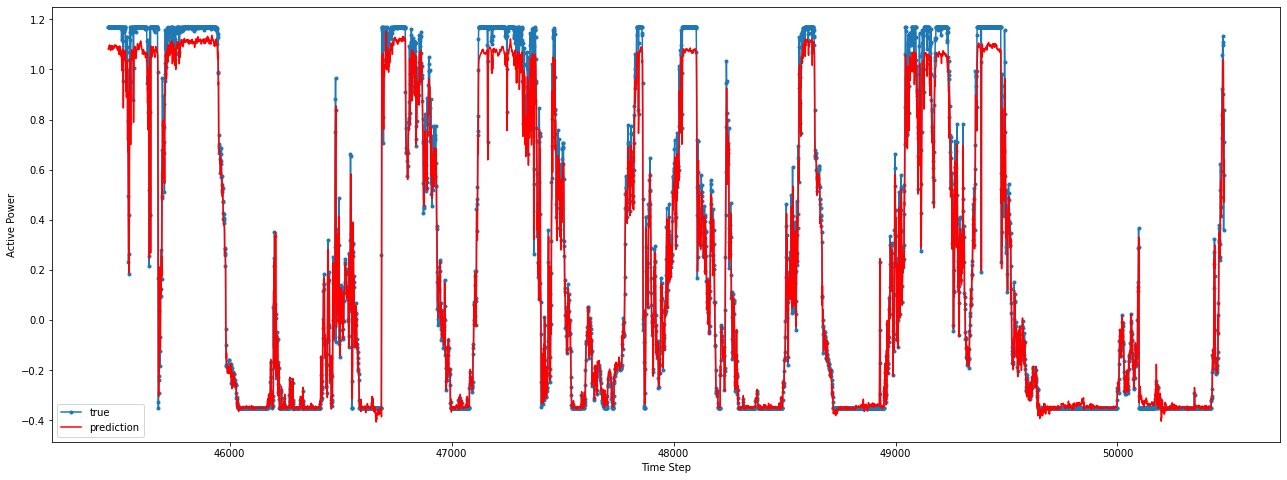

In [132]:
# check the pedictions visually
plt.figure(figsize=(22,8))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Active Power')
plt.xlabel('Time Step')
plt.legend()
plt.show();

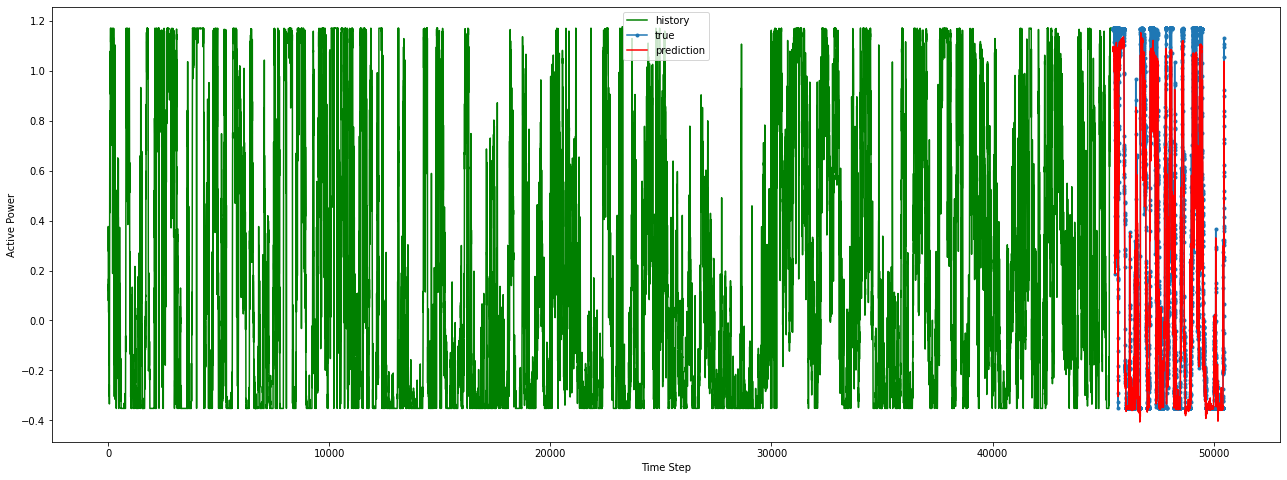

In [136]:
# check the pedictions visually
plt.figure(figsize=(22,8))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Active Power')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [142]:
train

,ActivePower,WindSpeed,TheorticalPower,WindDir
Date/Time,,,,
2018-01-01 00:00:00,-0.191458,-0.295936,-0.232227,1.238918
2018-01-01 00:10:00,-0.160318,-0.235616,-0.194452,1.295961
2018-01-01 00:20:00,-0.222576,-0.311867,-0.241500,1.321848
2018-01-01 00:30:00,-0.174732,-0.237704,-0.195834,1.313227
2018-01-01 00:40:00,-0.191203,-0.251367,-0.204741,1.276388
...,...,...,...,...
2018-11-26 18:10:00,1.169134,2.067541,0.928743,0.805400
2018-11-26 18:20:00,1.169184,2.200888,0.928743,0.821217
2018-11-26 18:30:00,1.169392,2.146787,0.928743,0.819049


In [14]:
# looking daily at the data
time_steps = 24

X_train_cp, y_train_cp = create_dataset(train_cp, train_cp.ActivePower, time_steps)
X_test_cp, y_test_cp = create_dataset(test_cp, test_cp.ActivePower, time_steps)

# reshape to [samples, time_steps, n_features]
print(X_train_cp.shape, y_train_cp.shape)

(41915, 24, 4) (41915,)
